# 6.2 Exploring relationships

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### check matplot version

In [2]:
matplotlib.__version__

'3.7.0'

#### ensure charts are displayed without having to call them 

In [8]:
%matplotlib inline

### define path and import data

In [25]:
path = r'C:\Users\R.DESKTOP-CVK0RF1\Desktop\alessia6.2'

In [26]:
df = pd.read_csv(os.path.join(path, 'apr20_rent_33_col.csv'))

### 2. Data Cleaning

#### checking Columns:

In [28]:
df.columns

Index(['Unnamed: 0', 'obj_regio1', 'obj_heatingType', 'obj_cId',
       'obj_newlyConst', 'obj_pricetrend', 'obj_yearConstructed',
       'obj_pricetrendbuy', 'obj_firingTypes', 'obj_ExclusiveExpose',
       'geo_bln', 'obj_cellar', 'obj_houseNumber', 'obj_livingSpace',
       'geo_krs', 'obj_zipCode', 'obj_condition', 'obj_street',
       'obj_streetPlain', 'geo_plz', 'obj_noRooms', 'geo_land', 'ga_cd_via',
       'obj_immotype', 'obj_telekomInternetProductAvailable',
       'obj_barrierFree', 'obj_regio3', 'obj_objectnumber',
       'obj_livingSpaceRange', 'obj_regio2', 'obj_telekomTvOffer',
       'obj_telekomUploadSpeed', 'obj_telekomDownloadSpeed', 'obj_totalRent'],
      dtype='object')

#### creating subset with only the columns I am interested in

In [31]:
df_sub = df[['obj_regio1', 'obj_heatingType', 'obj_newlyConst', 'obj_yearConstructed', 'obj_barrierFree', 'obj_cellar', 'obj_zipCode', 'obj_noRooms', 'obj_totalRent']]

In [32]:
df_sub.columns

Index(['obj_regio1', 'obj_heatingType', 'obj_newlyConst',
       'obj_yearConstructed', 'obj_barrierFree', 'obj_cellar', 'obj_zipCode',
       'obj_noRooms', 'obj_totalRent'],
      dtype='object')

#### checking subset:

In [34]:
df_sub.shape

(83273, 9)

In [35]:
df_sub.dtypes

region               object
heating type         object
new construction     object
year constructed    float64
barrier free         object
cellar               object
zip code              int64
nr. of rooms        float64
rent                float64
dtype: object

In [36]:
df.isnull().sum()

region                  0
heating type        10466
new construction        0
year constructed    18079
barrier free            0
cellar                  0
zip code                0
nr. of rooms            0
rent                11905
dtype: int64

### 3. Exploring Relationships

### Correlations:

### creating a correlation matrix

In [37]:
df_sub.corr()

C:\Users\R.DESKTOP-CVK0RF1\AppData\Local\Temp\ipykernel_800\2510699769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub.corr()


,year constructed,zip code,nr. of rooms,rent
year constructed,1.000000,0.165869,0.024410,0.182014
zip code,0.165869,1.000000,0.047573,0.285495
nr. of rooms,0.024410,0.047573,1.000000,0.368918
rent,0.182014,0.285495,0.368918,1.000000


### correlation heatmap

#### checking the data

In [50]:
df_sub

,region,heating type,new construction,year constructed,barrier free,cellar,zip code,nr. of rooms,rent
0,Nordrhein_Westfalen,floor_heating,y,2019.0,y,y,33602,2.0,887.0
1,Nordrhein_Westfalen,central_heating,n,2002.0,n,y,32339,2.0,690.0
2,Bayern,central_heating,n,2015.0,n,y,82544,2.0,1885.0
3,Nordrhein_Westfalen,gas_heating,n,1964.0,n,y,51103,3.0,940.0
4,Nordrhein_Westfalen,central_heating,n,1855.0,n,n,44265,3.0,700.0
...,...,...,...,...,...,...,...,...,...
83268,Nordrhein_Westfalen,central_heating,n,1983.0,n,y,51103,2.0,780.0
83269,Sachsen,self_contained_central_heating,n,1900.0,n,y,9116,2.0,300.0
83270,Sachsen_Anhalt,NaN,n,1990.0,n,n,6124,3.0,416.0
83271,Sachsen,central_heating,n,2006.0,n,y,8427,3.0,410.0


C:\Users\R.DESKTOP-CVK0RF1\AppData\Local\Temp\ipykernel_800\3041066159.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)


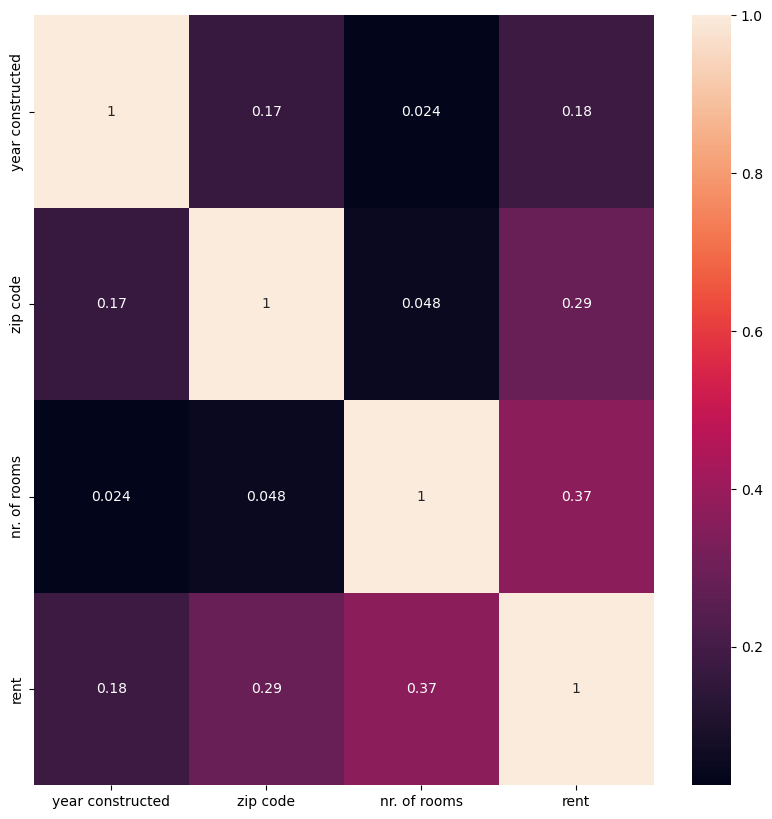

In [51]:
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) 

According to this heatmap, relationships are represented with the following colors:

    Very Strong : White
    Fairly Strong: Orange
    Moderate: Red
    Weak: Purple
    no relationship: Black

So we can see the correlations between the different variables:

rent is weakly correlated to:

   number of rooms, zip code

and much less correlated to:
    
    year of construction


### Scatterplots:

####  investigating the correlation between rent/nr. of rooms, and rent/zip code

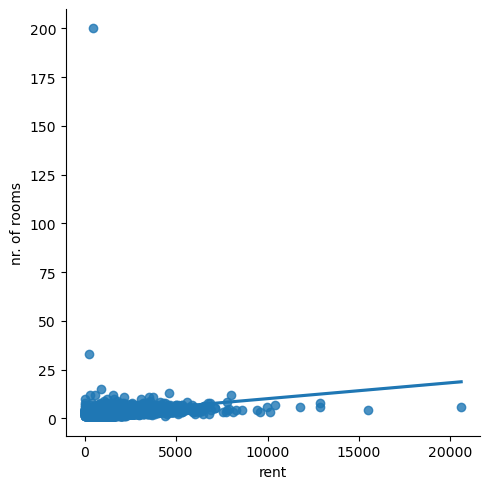

In [52]:
sns.lmplot(x = 'rent', y = 'nr. of rooms', data = df_sub)

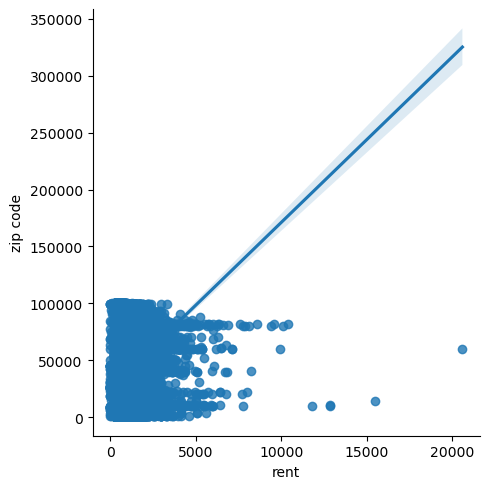

In [53]:
sns.lmplot(x = 'rent', y = 'zip code', data = df_sub)

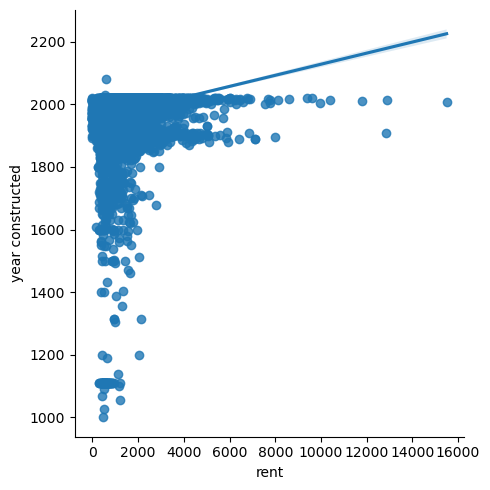

In [54]:
sns.lmplot(x = 'rent', y = 'year constructed', data = df_sub)

## Notes: 
1-The positive correlation between number of rooms and rent is positive and clear. The higher the amount of room an hause has, the higher will be the rent.
2-In the case of the correlation between rent and zip code, the plot clarifies that the correlation we established in the correlation heatmap is non-existant.
In fact, zip codes are being treated here as an integer, while they are in reality strings. 
3-The year of construction/rent correlation is also positive, where more modern houses have higher prices.


### Pair Plots:

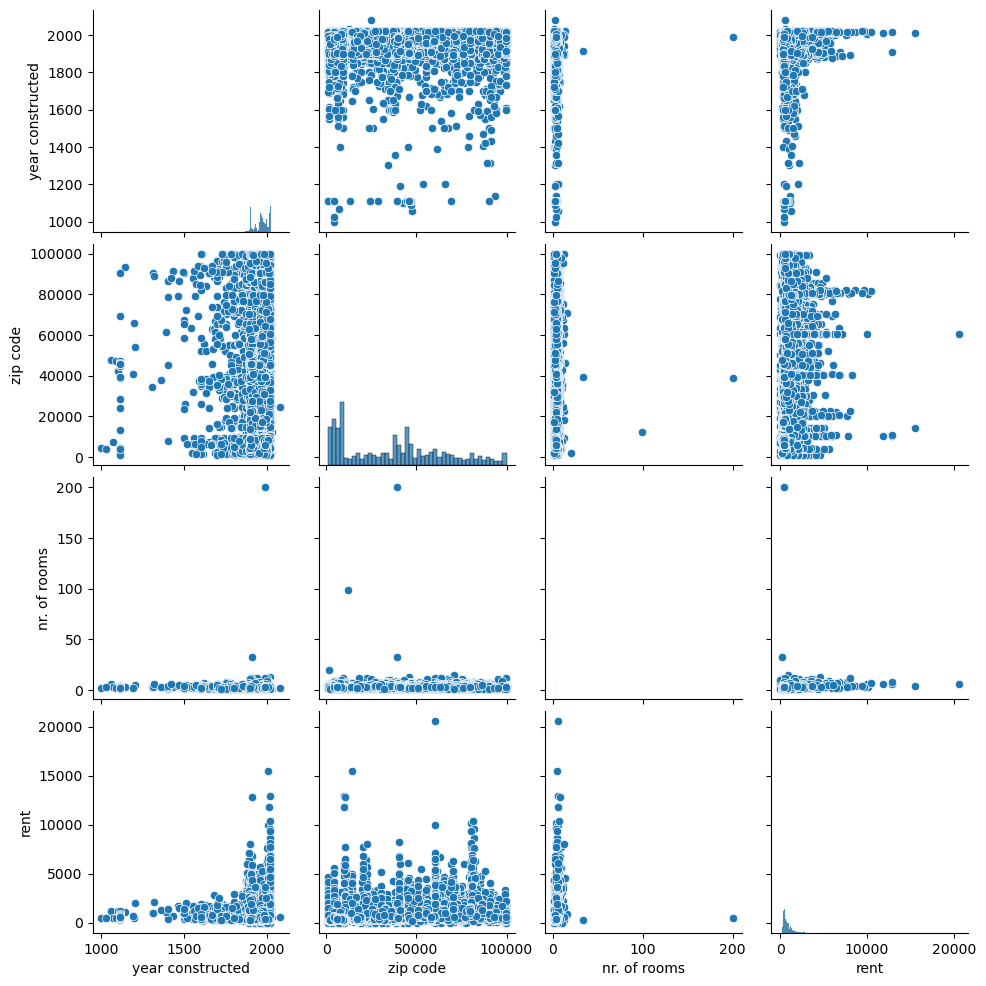

In [55]:
g = sns.pairplot(df_sub)

### Categorical Plots:

### visualization of the most frequente rent range

<Axes: xlabel='rent', ylabel='Count'>

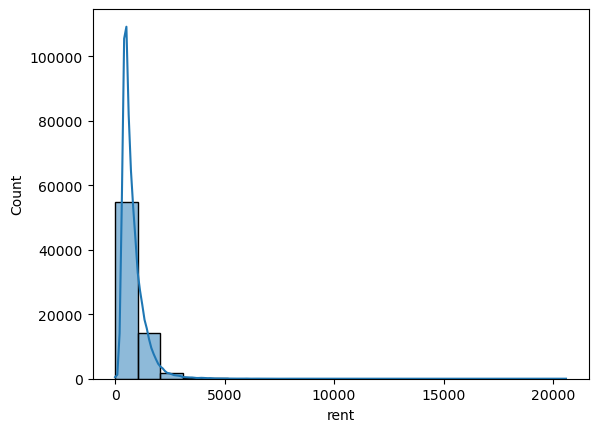

In [56]:
sns.histplot(df_sub['rent'], bins = 20, kde = True)

## Note:
The above distribution shows that the vast majority of the rent prices in Germany are below 1k per month, and this makes perfectly sense.

## Findings and hypothesis

From the above analysis, seems tat the factors that influence rent are number of rooms and year of construction.
My hypothesis is that also zip code influences the prices, but this neds further exploration.
